In [69]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
# Forward Propagate
def forward_propagate(W, X, b):
    return (W @ X + b).reshape(1, X.shape[1])

In [422]:
# Cost Function
def compute_cost(y_hat, y):
    return 1 /(2 * y.shape[1]) * ((y_hat - y) @ (y_hat - y).T)

In [179]:
# Import Dataset
df = pd.read_csv('ex1data1.csv')

X = torch.tensor(df['W'].values).reshape(df['W'].shape[0], 1).T
y = torch.tensor(df['Y'].values).reshape(df['Y'].shape[0], 1).T

X = X.float()
y = y.float()

In [180]:
# Naive Implementation to find best weight
def find_best_weight(start, end, increment, X_t, y_t, b):
    costs = []
    weights = []
    best_weight = 0
    best_cost = 100000
    for w in torch.arange(start, end, increment):
        y_pred = forward_propagate(w.reshape(1, 1), X_t, b)
        costs.append(compute_cost(y_pred, y_t))
        weights.append(w)
        if(compute_cost(y_pred, y_t) < best_cost):
            best_cost = compute_cost(y_pred, y_t)
            best_weight = w
    return costs, weights, best_weight.reshape(1, 1)

In [181]:
# Function to plot Costs vs Weights
def plot_costs_vs_weights(costs_p, weights_p):
    plt.title('Costs vs Weights')
    plt.xlabel('Weights')
    plt.ylabel('Costs')
    plt.plot(weights_p, costs_p)
    plt.show()

In [182]:
# Function to plot Dataset
def plot_dataset(X_t, y_t):
    plt.title('Ex1Data1')
    plt.xlabel('Features')
    plt.ylabel('Labels')
    plt.scatter(X_t, y_t)
    plt.show()

In [274]:
# Function to plot Dataset with Model
def plot_dataset_with_model(X_t, y_t, best_weight, b):
    plt.title('Ex1Data1')
    plt.xlabel('Features')
    plt.ylabel('Labels')
    plt.scatter(X_t, y_t)
    
    # Print Line
    y_pred = []
    line_start, _ = torch.min(X_t, 1)
    line_end, _ = torch.max(X_t, 1)
    for x in range(int(line_start.item()) - 5, int(line_end.item()) + 5):
        y_pred.append(best_weight * x + b)
    plt.plot(range(int(line_start.item()) - 5, int(line_end.item()) + 5), y_pred, color = 'b')
    plt.show()

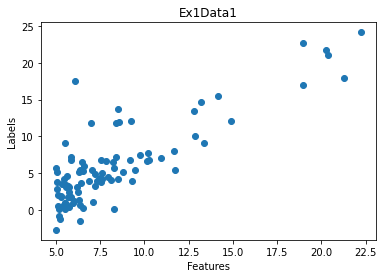

In [275]:
plot_dataset(X, y)

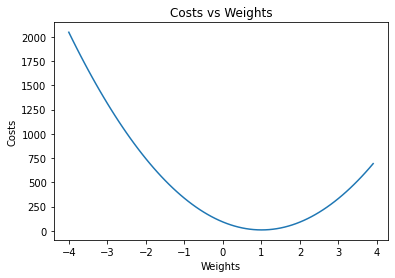

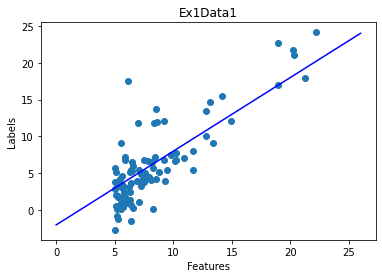

In [276]:
bias = torch.Tensor([[-2]])
costs, weights, best_weight = find_best_weight(-4, 4, 0.1, X, y, bias)
plot_costs_vs_weights(costs, weights)
plot_dataset_with_model(X, y, best_weight, bias)

In [428]:
# Function which calculates gradients
def get_grads(W, X, y, b):
    y_hat = forward_propagate(W, X, b)
    m = y.shape[1]
    grad1 = 1 / m * ((y_hat - y) @ X.T)
    grad2 = 1 / m * torch.sum((y_hat - y), axis = 1, keepdims = True)
    return [grad1, grad2]

In [429]:
# Function to update parameters
def update_params(W, b, grads, learning_rate):
    return [W - learning_rate * grads[0], b - learning_rate * grads[1], ]

In [435]:
def gradient_descent(W, X, y, b, iterations, learning_rate):
    costs = []
    for epoch in range(iterations):
        grads = get_grads(W, X, y, b)
        [W, b] = update_params(W, b, grads, learning_rate)
        l = compute_cost(forward_propagate(W, X, b), y)
        print("Epoch :", epoch, "Loss :", l.item())
        costs.append(l.item())
    plot_dataset_with_model(X, y, W, b)
    
    return costs

In [436]:
def plot_log(costs):
    plt.title('Cost vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.plot(costs)
    plt.show()

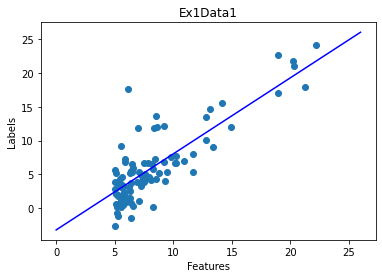

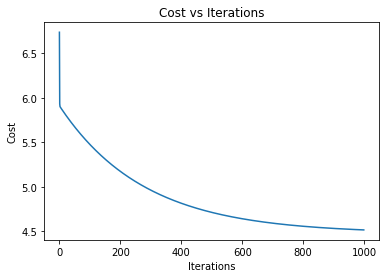

In [439]:
W = torch.Tensor([[0]])
b = torch.Tensor([[0]])
costs = gradient_descent(W, X, y, b, 1000, 0.01)
plot_log(costs)

SyntaxError: unexpected EOF while parsing (<ipython-input-434-7226b44d292c>, line 1)